### K-Mean Clustering Algorithm with the Data of Crimes in the USA in 197

#### **Importing the libraries**

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

**Dataset: the data of crimes such as assault, robbery, murder, etc. committed in the US in 1973.**

#### **Loading the dataset**

In [81]:
df = pd.read_csv('USArrests.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [82]:
df = pd.read_csv('USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


This dataset presents crime rates and urban population percentages across U.S. states. It includes data on murders, assaults, and rapes per 100,000 people, as well as the proportion of each state’s population living in urban areas. For instance, Alaska shows high rates of assault (263) and rape (44.5), while California has the highest urban population at 91%.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.0+ KB


In [84]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


#### **EDA (Data Exploratory Analysis)**

Visualize of the differences in crimes city by city.

#### **Modelling**

In [85]:
from sklearn.cluster import KMeans

In [86]:
k_means = KMeans(n_clusters=2, random_state=42)

In [87]:
k_means.fit(df)

KMeans(n_clusters=2, random_state=42)

In [88]:
cluster_labels = k_means.labels_

In [89]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

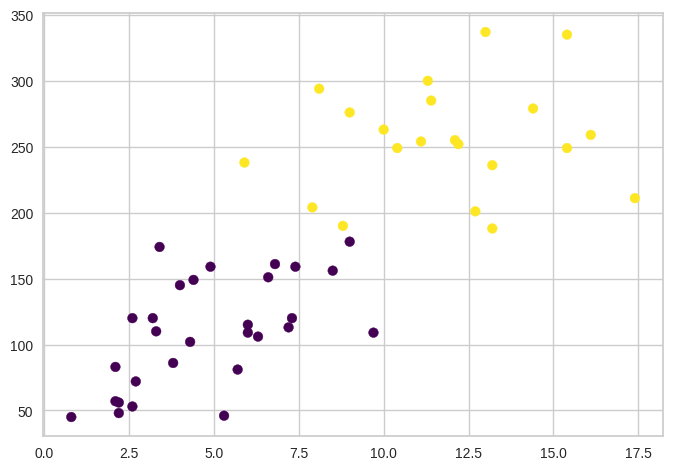

In [90]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster_labels, cmap='viridis') #accessing the first two columns


In [91]:
centroids = k_means.cluster_centers_

Here is the center of gravity data on the X and Y axis according to the four variables.

In [92]:
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

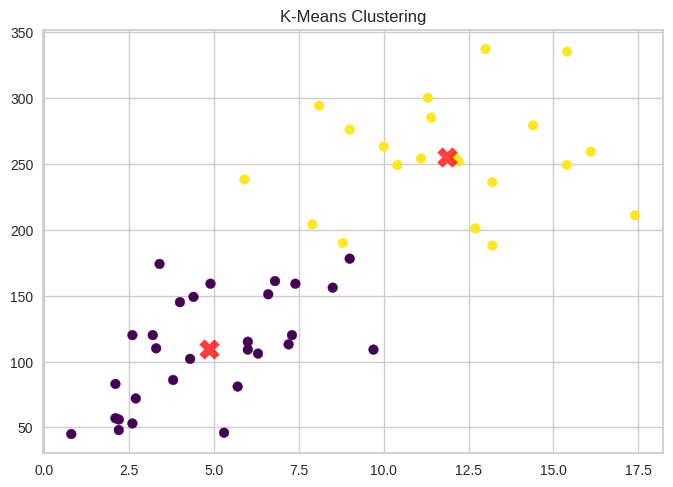

In [93]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X') #plotting the centroids
plt.title("K-Means Clustering")
plt.show()

So, it clustered the two classes by calculating around their centroids.

#### **Elbow Method**
- Using this method, we can choose the best clustering number.

**Method 1**

In [94]:
rate = []
K = range(2, 10)
for i in K:
    k_means = KMeans(n_clusters=i)
    k_means.fit(df)
    rate.append(k_means.inertia_) #inertia is the sum of squared distances to the nearest cluster center

In [95]:
rate

[96399.02814449919,
 47964.265357142845,
 34728.629357142854,
 24769.26285714285,
 27986.592944444437,
 15463.47377777778,
 15042.37608333334,
 13236.301500000003]

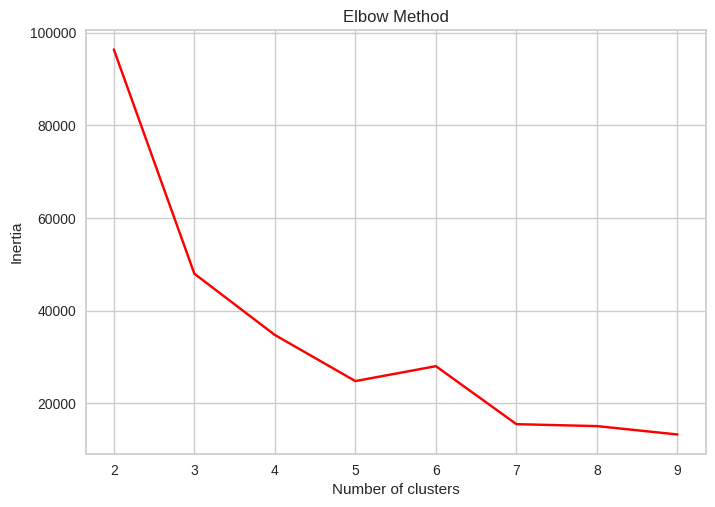

In [96]:
plt.plot(K, rate, "red")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

**Method 2**

In [97]:
from yellowbrick.cluster import KElbowVisualizer

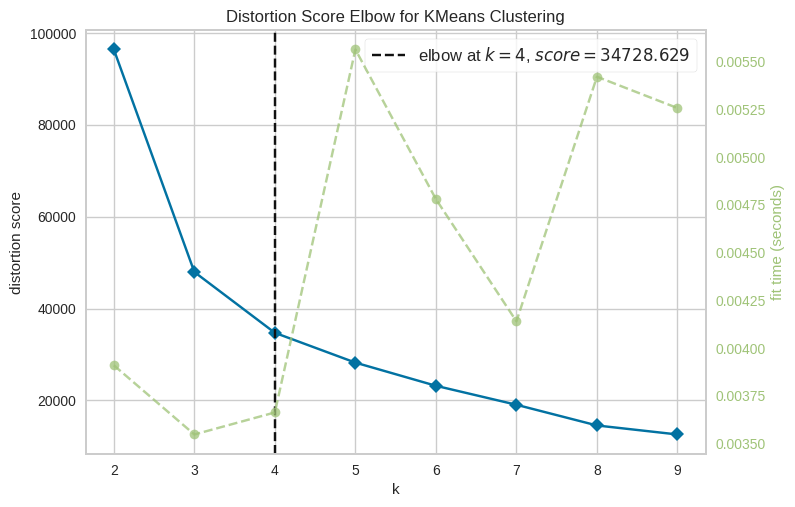

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [98]:
kmeans_yellowbrick = KMeans()
visualizer = KElbowVisualizer(kmeans_yellowbrick, k=(2, 10), metric='distortion')
visualizer.fit(df)
visualizer.show()

In [99]:
new_k_means = KMeans(n_clusters=4, random_state=42)


In [100]:
new_k_means.fit(df)


KMeans(n_clusters=4, random_state=42)

In [101]:
new_cluster_labels = new_k_means.labels_

In [102]:
new_cluster_labels

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [103]:
df['cluster_id'] = new_cluster_labels
df.head()
#Last colum n is the cluster id

,Murder,Assault,UrbanPop,Rape,cluster_id
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


### **Evaluate the model performance**

Silhouette Score

Silhouette scores are going to measure the separation distance between the clusters.
- the closer the score is to 1, the better the clustering.
- the closer the score is to -1, the worse the clustering.
- the closer the score is to 0, the more overlapping the clusters are.

In [104]:
from sklearn.metrics import silhouette_score

In [105]:
print(f"silhouette score(n_clusters=4): {silhouette_score(df, new_cluster_labels)}")

silhouette score(n_clusters=4): 0.5016267918708461


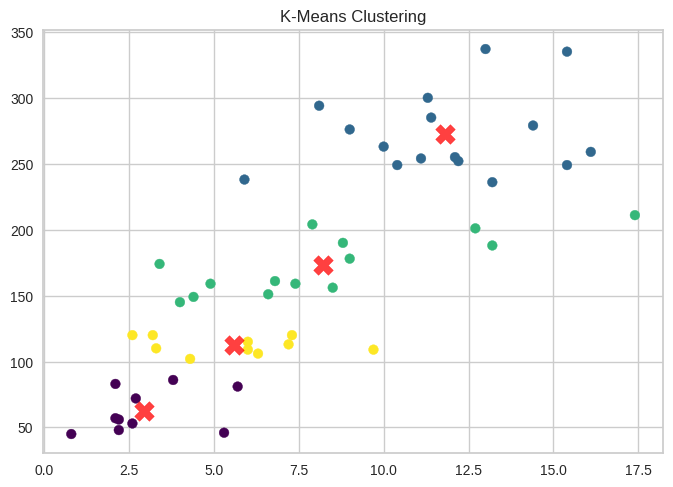

In [106]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=new_cluster_labels, cmap='viridis')
plt.scatter(new_k_means.cluster_centers_[:, 0], new_k_means.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X') #plotting the centroids
plt.title("K-Means Clustering")
plt.show()

In [107]:
#Start writing here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [108]:
# Load the same dataset used earlier (assuming it's already available as 'df')
# If not, load it again here:
df = pd.read_csv('USArrests.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [109]:
# Drop non-numeric columns if needed
df_numeric = df.select_dtypes(include=['float64', 'int64'])


In [110]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

In [111]:
# Perform Hierarchical Clustering (using Ward's method)
linked = linkage(scaled_data, method='ward')

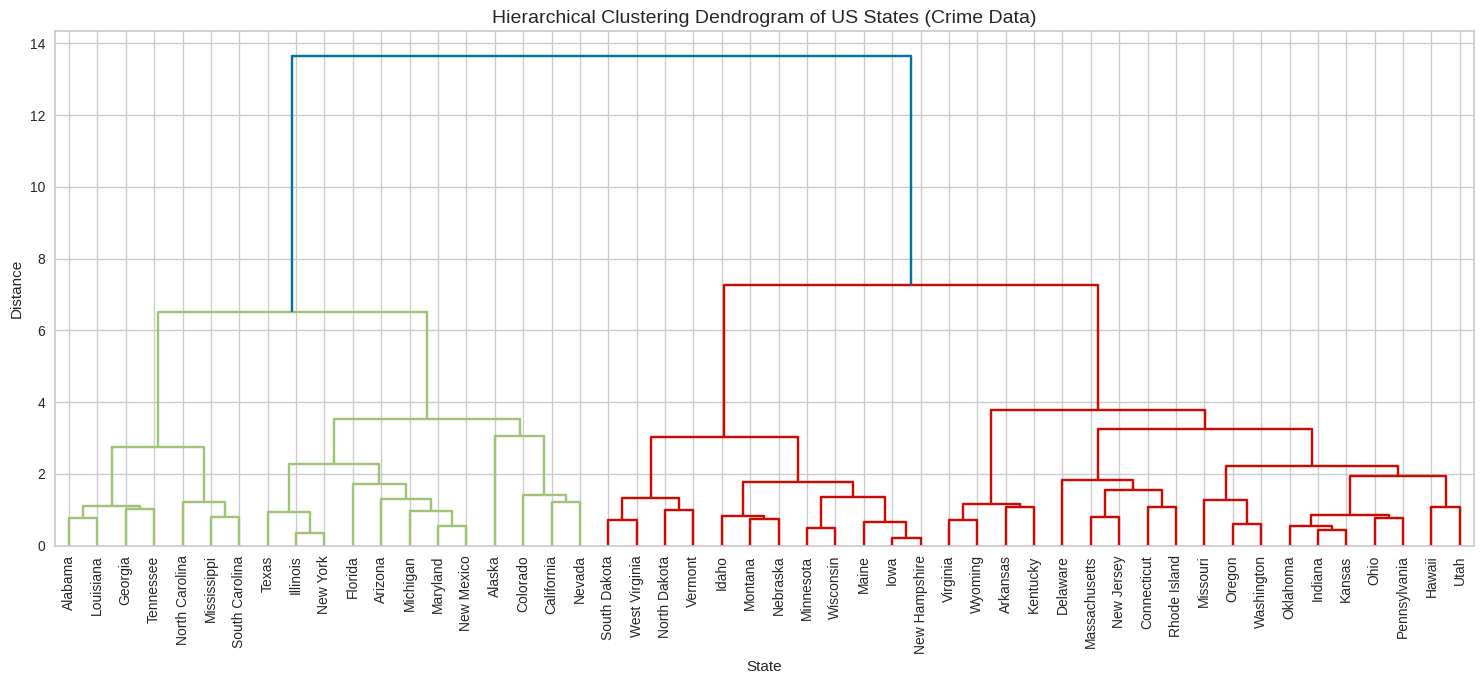

In [112]:
# Plot the dendrogram with state names
plt.figure(figsize=(15, 7))
dendrogram(linked,
           labels=df["Unnamed: 0"].values,  # Show state names
           leaf_rotation=90,
           leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram of US States (Crime Data)', fontsize=14)
plt.xlabel('State')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


The dendrogram shows how states are grouped based on similarities in their crime statistics (Murder, Assault, UrbanPop, and Rape). Each branch connects states that have similar crime patterns.

* States that are joined at the bottom are more similar to each other.

* The higher up the branches join, the more different those states (or clusters of states) are.

* For example, if California and New York are connected early (lower down), it means they have similar crime profiles.

* If a state connects far from others (higher up), it has a unique crime pattern, possibly very high or very low rates.

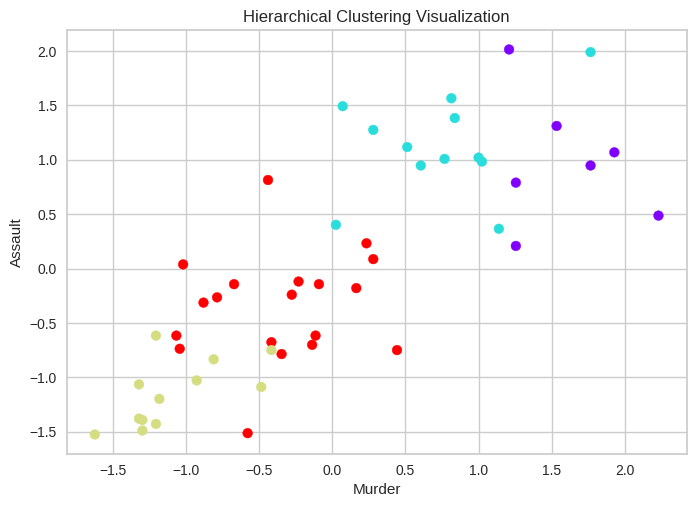

In [113]:
num_clusters = 4
clusters = fcluster(linked, num_clusters, criterion='maxclust')

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='rainbow')
plt.title('Hierarchical Clustering Visualization')
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.show()

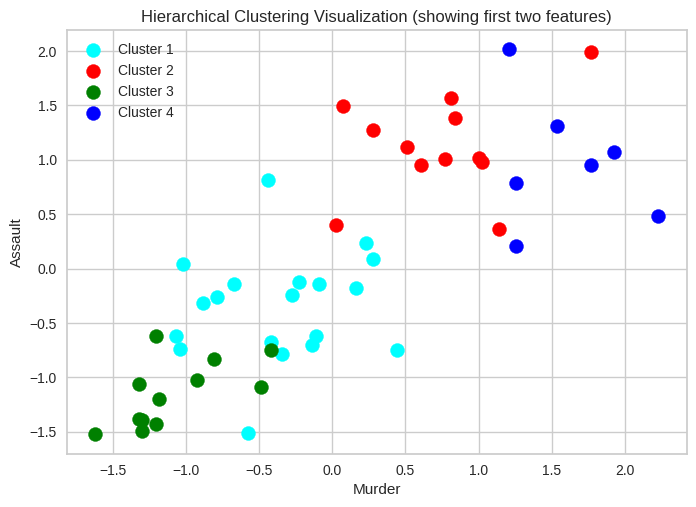

In [114]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc = hc.fit_predict(scaled_data)

# Corrected scatter plot syntax
plt.scatter(scaled_data[y_hc == 0, 0], scaled_data[y_hc == 0, 1], s=100, c='cyan', label='Cluster 1')
plt.scatter(scaled_data[y_hc == 1, 0], scaled_data[y_hc == 1, 1], s=100, c='red', label='Cluster 2')
plt.scatter(scaled_data[y_hc == 2, 0], scaled_data[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(scaled_data[y_hc == 3, 0], scaled_data[y_hc == 3, 1], s=100, c='blue', label='Cluster 4')

plt.title('Hierarchical Clustering Visualization (showing first two features)')
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.legend()
plt.show()

This scatter plot identify regional or behavioral patterns in crime rates across different U.S. states.

* The plot groups the states into 4 distinct clusters based on similarities in their crime statistics.

* Each colored cluster (cyan, red, green, blue) represents a group of states with similar crime profiles.

* The axes represent the first two features (e.g., Murder and Assault), so the positions are based on just these two variables.

* States in the same cluster share similar values for the plotted crime features.

* For example, Cluster 1 (cyan) might represent states with high murder and assault rates, while Cluster 4 (blue) could include states with lower crime rates.



In [115]:
# Perform the actual clustering by cutting the dendrogram (example: 4 clusters)
num_clusters = 4
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Add the cluster assignments back to the original DataFrame
df['HierarchicalCluster'] = clusters

# Display the head of the DataFrame with the new cluster column
print("DataFrame with Hierarchical Cluster assignments:")
print(df.head())

# See how many data points are in each cluster
print("\nCounts of data points per cluster:")
print(df['HierarchicalCluster'].value_counts())

DataFrame with Hierarchical Cluster assignments:
   Unnamed: 0  Murder  Assault  UrbanPop  Rape  HierarchicalCluster
0     Alabama    13.2      236        58  21.2                    1
1      Alaska    10.0      263        48  44.5                    2
2     Arizona     8.1      294        80  31.0                    2
3    Arkansas     8.8      190        50  19.5                    4
4  California     9.0      276        91  40.6                    2

Counts of data points per cluster:
HierarchicalCluster
4    19
2    12
3    12
1     7
Name: count, dtype: int64


States with similar crime patterns are grouped into the same cluster.

As Described in Counts of data points per cluster: (HierarchicalCluster)

* Clusters 2 and 3 each have 12 states, suggesting two other common crime patterns. They might represent states with higher crime in specific categories (like assault or urban population).

* Cluster 4 is the largest (19 states) and might represent states with lower or moderate crime rates.

* Cluster 1 is the smallest (7 states), possibly containing states with very high or unique crime profiles.